In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('survey lung cancer.csv')

In [3]:
data

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES


In [4]:
data.tail

<bound method NDFrame.tail of     GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0        M   69        1               2        2              1   
1        M   74        2               1        1              1   
2        F   59        1               1        1              2   
3        M   63        2               2        2              1   
4        F   63        1               2        1              1   
..     ...  ...      ...             ...      ...            ...   
304      F   56        1               1        1              2   
305      M   70        2               1        1              1   
306      M   58        2               1        1              1   
307      M   67        2               1        2              1   
308      M   62        1               1        1              2   

     CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  \
0                  1         2         1         2                  2   
1      

In [27]:
X_data = data.drop(columns =['LUNG_CANCER','GENDER'], axis= 1)
y_data = data['LUNG_CANCER']

X_data

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
0,69,1,2,2,1,1,2,1,2,2,2,2,2,2
1,74,2,1,1,1,2,2,2,1,1,1,2,2,2
2,59,1,1,1,2,1,2,1,2,1,2,2,1,2
3,63,2,2,2,1,1,1,1,1,2,1,1,2,2
4,63,1,2,1,1,1,1,1,2,1,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,56,1,1,1,2,2,2,1,1,2,2,2,2,1
305,70,2,1,1,1,1,2,2,2,2,2,2,1,2
306,58,2,1,1,1,1,1,2,2,2,2,1,1,2
307,67,2,1,2,1,1,2,2,1,2,2,2,1,2


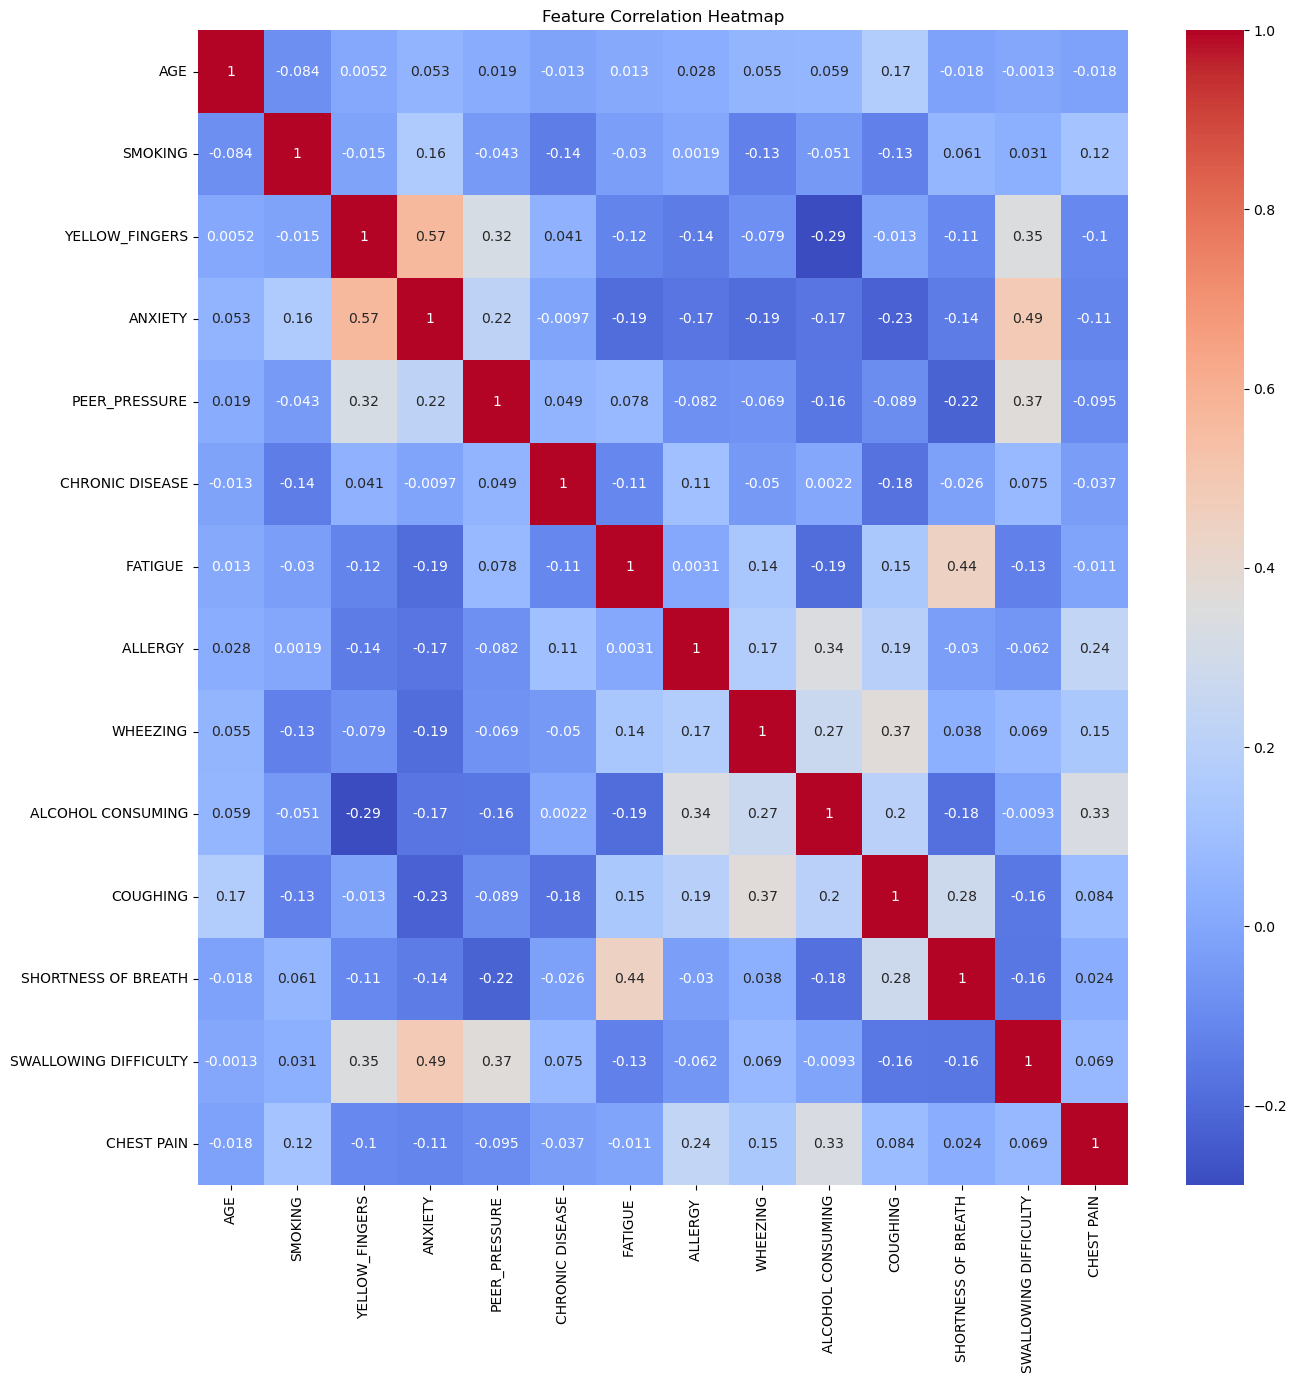

In [29]:
plt.figure(figsize=(15, 15))
correlation_matrix = X_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.savefig('correlation-coefficient3.jpg')
plt.show()


In [31]:
data.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

<Axes: >

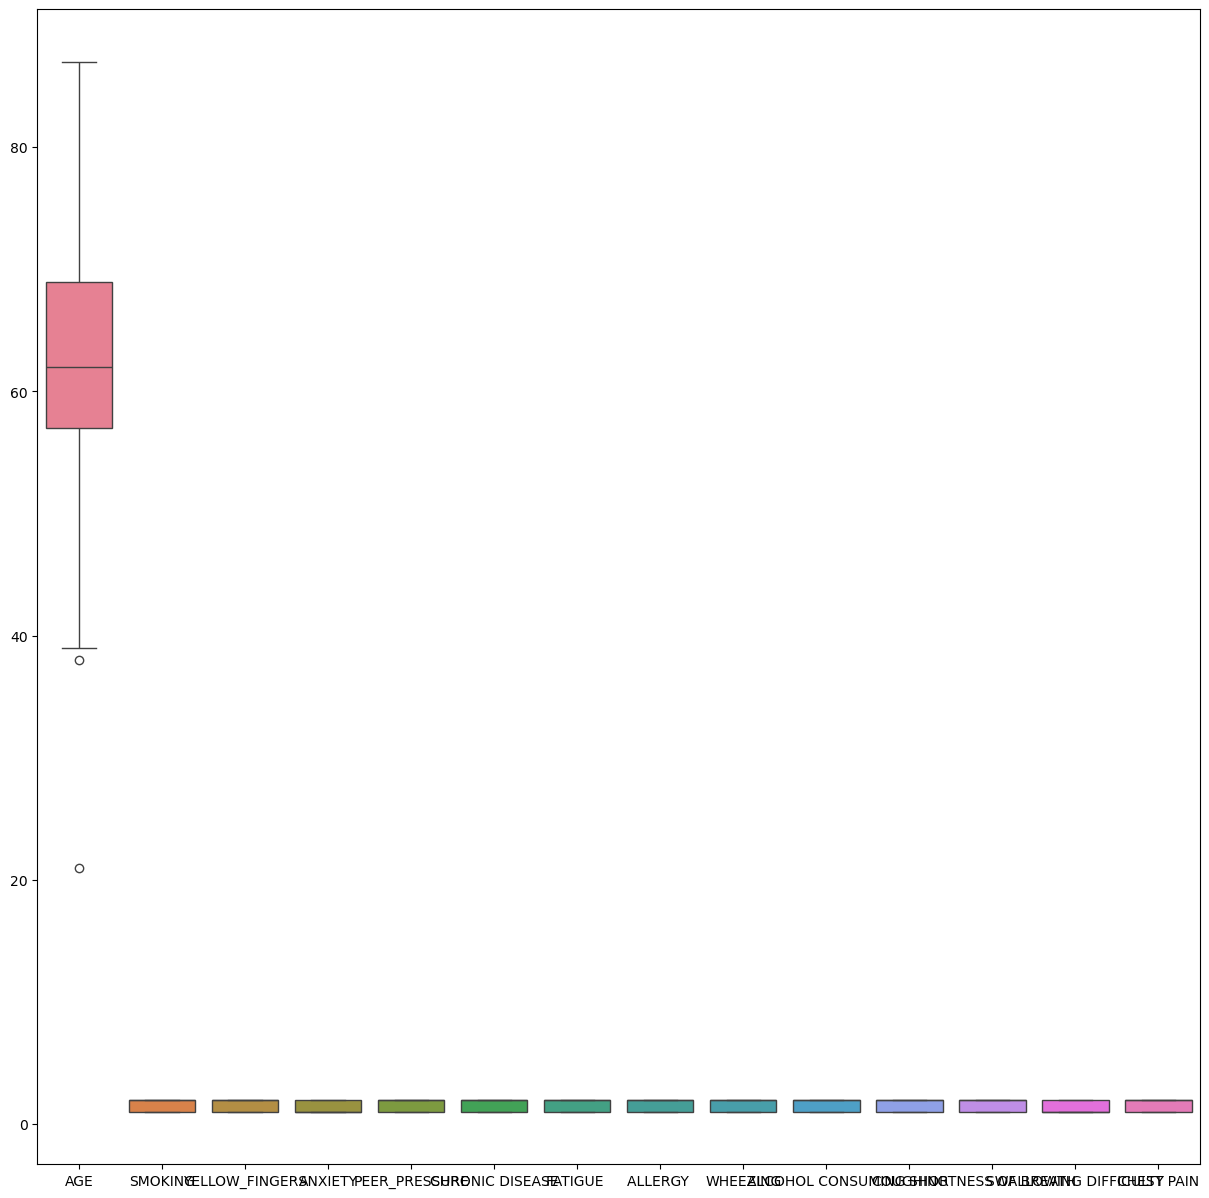

In [33]:
fig,ax = plt.subplots(figsize =(15,15))
sns.boxplot(data = data, ax = ax)

In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_data)

<Axes: >

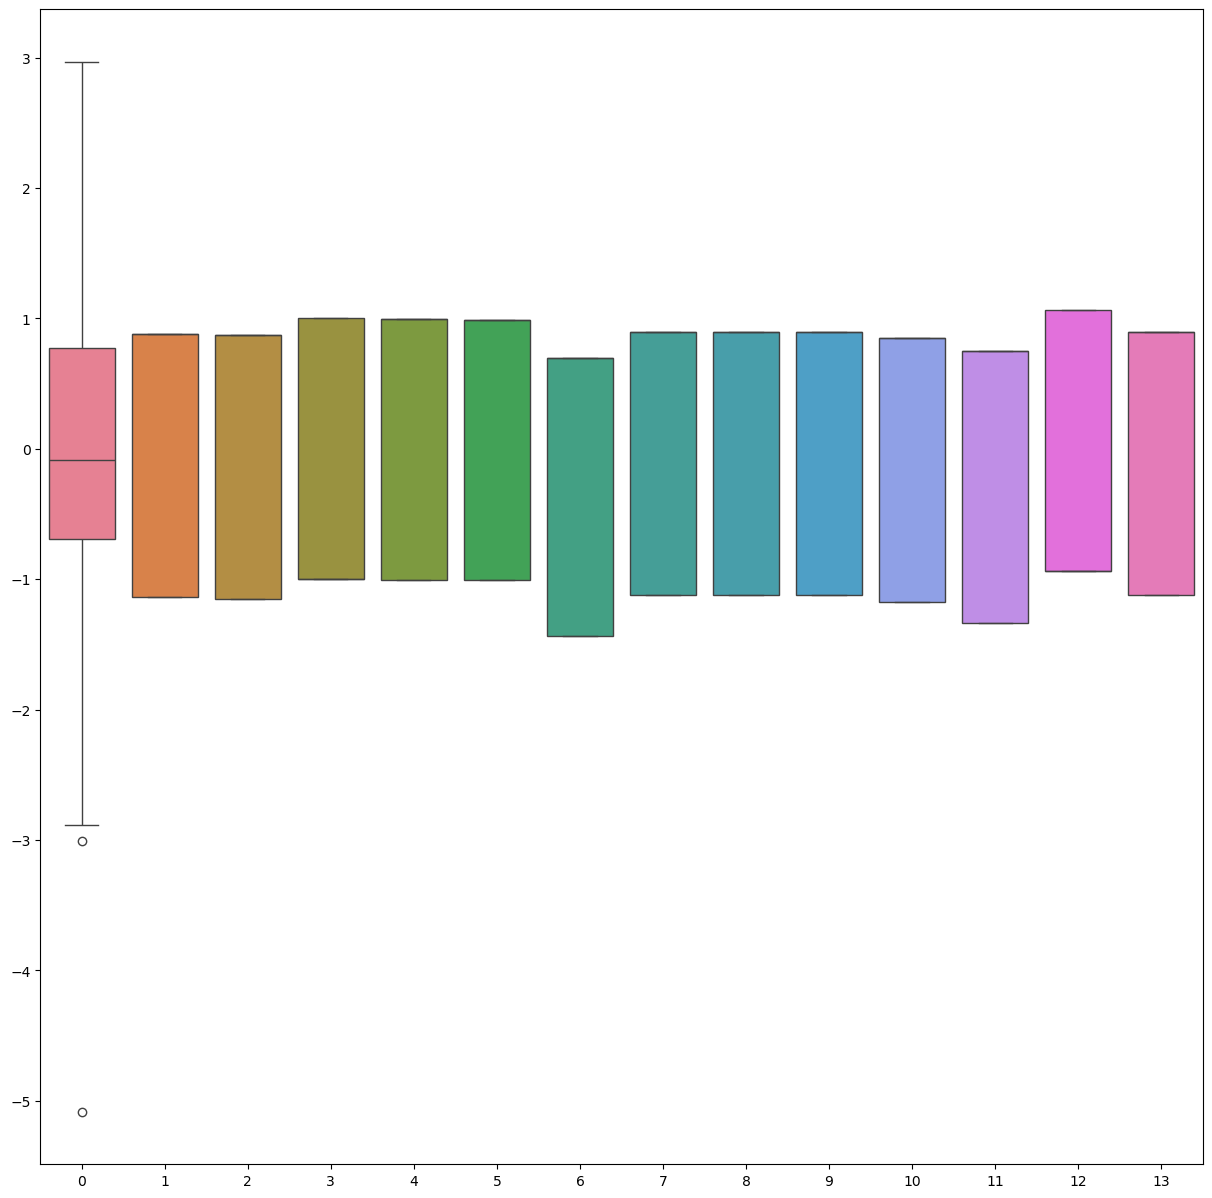

In [39]:
fig,ax = plt.subplots(figsize =(15,15))
sns.boxplot(data = X_scaled, ax = ax)

In [45]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split( X_data,y_data , test_size =  0.33,random_state = 32)

In [47]:
X_train.shape

(207, 14)

In [51]:
X_test.shape


(102, 14)

In [55]:
y_train.value_counts()

LUNG_CANCER
YES    181
NO      26
Name: count, dtype: int64

In [57]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 42)
X_train_resampled , Y_train_resampled = smote.fit_resample(X_train,y_train)

In [59]:
print(pd.Series(Y_train_resampled).value_counts())

LUNG_CANCER
YES    181
NO     181
Name: count, dtype: int64


In [61]:
from sklearn.linear_model  import LogisticRegression
classification = LogisticRegression()
classification.fit(X_train_resampled,Y_train_resampled)

C:\Users\singh\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [63]:
y_predict = classification.predict(X_test)
print(y_predict)

['YES' 'YES' 'NO' 'YES' 'YES' 'YES' 'NO' 'YES' 'YES' 'NO' 'YES' 'YES'
 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'NO' 'YES' 'YES' 'YES' 'YES' 'YES'
 'YES' 'YES' 'YES' 'YES' 'NO' 'YES' 'NO' 'YES' 'YES' 'YES' 'YES' 'YES'
 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES'
 'NO' 'YES' 'YES' 'NO' 'YES' 'YES' 'NO' 'YES' 'YES' 'YES' 'YES' 'YES'
 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'NO' 'YES' 'YES' 'YES'
 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES'
 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES'
 'YES' 'YES' 'YES' 'YES' 'YES' 'YES']


In [65]:

from sklearn.metrics import accuracy_score
accaurate_pred = accuracy_score(y_test,y_predict)
print(accaurate_pred)

0.9509803921568627


from sklearn.metrics import classification_report
target_names = ['cnacer', 'no_cnacer']
print(classification_report(y_test, y_predict, target_names=target_names))


In [71]:
import pickle 
pickle.dump(classification,open('classification_model.pkl5','wb'))